In [1]:
import random
import pandas as pd
import seaborn as sns
random.seed(1111)

In [2]:
def gen_cards(num_decks):
#Generates deck of cards and shuffles. Cards are delt starting at index 0 and removed from deck.
    card_deck=[]
    cards=[1,2,3,4,5,6,7,8,9,10,10,10,10]
    for i in range(num_decks):
        for j in range(4):
            card_deck.extend(cards)
    random.shuffle(card_deck)
    return card_deck
#Matricies based on basic strategy card from blackjackapprenticeship.com
#soft count
#Player[Row] 13,14,15,16,17,18,19,20
#Dealer[Col] A,2,3,4,5,6,7,8,9,10
#0=stand,1=hit,2=double
soft_selection=[
    [1,1,1,1,2,2,1,1,1,1],
    [1,1,1,1,2,2,1,1,1,1],
    [1,1,1,2,2,2,1,1,1,1],
    [1,1,1,2,2,2,1,1,1,1],
    [1,1,2,2,2,2,1,1,1,1],
    [1,2,2,2,2,2,0,0,1,1],
    [0,0,0,0,0,2,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],]

#hard count
#Player[Row] 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
#Dealer[Col] A,2,3,4,5,6,7,8,9,10
#0=stand,1=hit,2=double
hard_selection=[
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,1,1,1,1,1,1,1,1],
    [1,1,2,2,2,2,1,1,1,1],
    [1,2,2,2,2,2,2,2,2,1],
    [2,2,2,2,2,2,2,2,2,2],
    [1,1,1,0,0,0,1,1,1,1],    
    [1,0,0,0,0,0,1,1,1,1],    
    [1,0,0,0,0,0,1,1,1,1],    
    [1,0,0,0,0,0,1,1,1,1],
    [1,0,0,0,0,0,1,1,1,1],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0]]

#split
#Player[Row] A,2,3,4,5,6,7,8,9,10
#Dealer[Col] A,2,3,4,5,6,7,8,9,10
#0=Don'tSplit,1=Split
split_selection=[
    [1,1,1,1,1,1,1,1,1,1],
    [0,0,0,1,1,1,1,0,0,0],
    [0,0,0,1,1,1,1,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],    
    [0,0,1,1,1,1,0,0,0,0],    
    [0,1,1,1,1,1,1,0,0,0],    
    [1,1,1,1,1,1,1,1,1,1],
    [0,1,1,1,1,1,0,1,1,0],
    [0,0,0,0,0,0,0,0,0,0],]

def hit(player):
#Add a new card to the person requesting it
    player.append(card_deck[0])
    card_deck.pop(0)
    return player

def split(player):
#Could not figure out in time, so function removes second card and replaces it with a new card
    player[-1]=card_deck[0]
    card_deck.pop(0)
    return player

def blackjack(dealer, player, bet):
#Checks for blackjack on player and dealer, makes payout
    bj=set([1,10])
    if set(player)==bj:
        if set(dealer)==bj:
            return 0, True, "draw"
        else:
            return bet*1.5, True, "player"
    elif set(dealer)==bj:
        return bet*-1, True, "dealer"
    return bet, False, "draw"

def initial_player_action(dealer, player, bet, win):  
    #gives a max of 5 hits
    for i in range(0,5):
        aces=(1 in player)*1
        hard=sum(player)
        if hard>19:
            return player, bet

        hard=sum(player)
        soft=hard
        if hard<=11:
            soft=hard+10*aces  
            
        if soft!=hard:
            if soft>=21:
                return player, bet
            if soft_selection[soft-13][dealer[0]-1]==1:
                hit(player)
            elif soft_selection[soft-13][dealer[0]-1]==2 and len(player)==2:
                hit(player)
                bet*=2
            else:
                return player, bet
        else:
            if hard_selection[hard-4][dealer[0]-1]==1:
                hit(player)
            elif hard_selection[hard-4][dealer[0]-1]==2 and len(player)==2:
                hit(player)
                bet*=2
            else:
                return player, bet
    
    return player, bet

def dealer_action(dealer, player):
    if sum(player)>21:
        return dealer
    aces=(1 in dealer)*1
    hard=sum(dealer)
    soft=hard
    #print("running dealer", hard, soft)
    if hard<=11:
        soft=hard+10*aces
    while soft<17 and hard <17:
        hit(dealer)
        hard=sum(dealer)
        soft=hard+10*aces
    return dealer

def totals(dealer, player, bet):
    tdealer=sum(dealer)
    if tdealer<=11 and 1 in dealer:
        tdealer+=10
    
    tplayer=sum(player)
    if tplayer<=11 and 1 in player:
        tplayer+=10
    
    #print("Dealer has ",tdealer, "vs player's", tplayer)
    if tplayer > 21:
        return 0-bet, "dealer"
    elif tplayer==tdealer:
        return 0, "draw"
    elif tplayer>tdealer:
        return bet, "player"
    
    if tdealer > 21:
        return bet, "player"
    else:
        return 0-bet, "dealer"
    
def deal(bet):
    #Deal two random cards to the dealer and player
    player=[card_deck[0], card_deck[2]]
    dealer=[card_deck[1], card_deck[3]]
    for i in range(0,4):
        card_deck.pop(0)
    bet, win, winner = blackjack(dealer,player,bet)
    return (dealer, player, bet, win, winner)   
        

In [3]:
#Basic Strategy 
#This cell is running 50 times, it will take multiple minutes
simchart=[]
simdata=[]
winners=[]
dealerstart=[]
playerstart=[]
playerend=[]
sim_data=pd.DataFrame()
for a in range(0,50):

    for i in range(0,100000):
        card_deck=gen_cards(1)
        dealer, player, bet, win, winner = deal(10)
        if win==False:
            player, bet=initial_player_action(dealer,player,bet,win)
            dealer_action(dealer, player)
        if win==False:
            bet, winner = totals(dealer, player, bet)
        simdata.append(bet)
        winners.append(winner)
        dealerstart.append(dealer[0])
        playerstart.append(player[0])
        playerend.append(player[1])
        #print(dealer, player, winner, bet)
    simchart.append(sum(simdata[-100000:]))


Min: -4490.0 Max: 11145.0 Avg: 2936.0


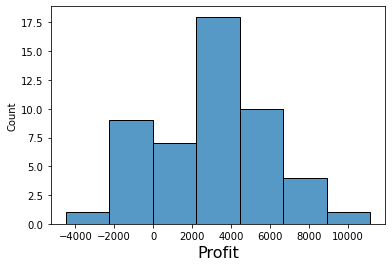

In [4]:
#Chart of total profit(loss) across 50 runs of 100,000 hands
ax=sns.histplot(simchart);
ax.set_xlabel("Profit",fontsize=16);
print("Min:",min(simchart), "Max:",max(simchart), "Avg:",sum(simchart)/len(simchart))


In [5]:
#Stats for total runs
x=winners.count("dealer")
y=winners.count("player")
z=winners.count("draw")
print("Total Profit(loss):",sum(simdata))
print("Dealer won",x,"hands")
print("Player won", y,"hands")
print("Draws", z)
print("Dealers win percentage",round((100*x/(y+x)),2))

Total Profit(loss): 146800.0
Dealer won 2397292 hands
Player won 2189714 hands
Draws 412994
Dealers win percentage 52.26


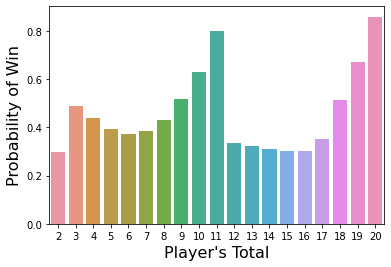

In [6]:
#Data collection 
#Combine all parts of sim into single dataframe
sim_data=pd.DataFrame({"Bet":simdata,"Winner": winners, "DealerStart":dealerstart,"PlayerStart":playerstart,"PlayerEnd":playerend})
sim_data["PlayerHas"]=sim_data["PlayerStart"]+sim_data["PlayerEnd"]
#Groupby player starting hand and who won for winning percentage
PlayerStat=sim_data.groupby(["PlayerHas", "Winner"]).count()
x=PlayerStat.xs('player', level=1)
y=PlayerStat.xs('dealer', level=1)
#Ignoring pushes, only care about win/loss
z=x/(x+y)
z1=[]
for i in range(0,len(z.values)):
    z1.append(z.values[i][0])
#Plot of Probabilities
ax = sns.barplot(x=z.index,y=z1)
ax.set_xlabel("Player's Total",fontsize=16);
ax.set_ylabel("Probability of Win",fontsize=16);

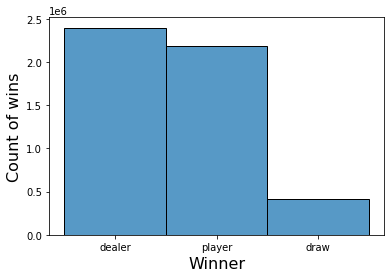

In [7]:
#Histogram of total hands win/loss/draw
ax=sns.histplot(winners)
ax.set_xlabel("Winner",fontsize=16);
ax.set_ylabel("Count of wins",fontsize=16);

In [8]:
def TheDouble(dealer, player, bet, win):  
    #Doubles down if player is under 12, hits between 12-16, stands on 17 or higher
    if sum(player)<12:
        hit(player)
        bet*=2
        return player,bet
    elif sum(player)<17:
        hit(player)
    return player, bet

In [9]:
#Double down anything under 12, hit 12-16, stand over 17
simdata=[]
winners=[]
dealerstart=[]
playerstart=[]
playerend=[]
sim_data=pd.DataFrame()
for i in range(0,100000):    
    card_deck=gen_cards(1)
    dealer, player, bet, win, winner = deal(10)
    if win==False:
        player, bet=TheDouble(dealer,player,bet,win)
        dealer_action(dealer,player)
    if win==False:
        bet, winner = totals(dealer, player, bet)
    simdata.append(bet)
    winners.append(winner)
    dealerstart.append(dealer[0])
    playerstart.append(player[0])
    playerend.append(player[1])

In [10]:
#Stats for final run
x=winners.count("dealer")
y=winners.count("player")
z=winners.count("draw")
print("Total Profit(loss):",sum(simdata))
print("Dealer won",x,"hands")
print("Player won", y,"hands")
print("Draws", z)
print("Dealers win percentage",round((100*x/(y+x)),2))

Total Profit(loss): -68010.0
Dealer won 50168 hands
Player won 42109 hands
Draws 7723
Dealers win percentage 54.37


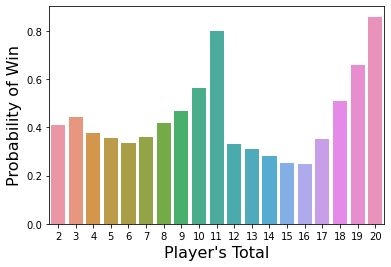

In [11]:
#Data collection 
#Combine all parts of sim into single dataframe
sim_data=pd.DataFrame({"Bet":simdata,"Winner": winners, "DealerStart":dealerstart,"PlayerStart":playerstart,"PlayerEnd":playerend})
sim_data["PlayerHas"]=sim_data["PlayerStart"]+sim_data["PlayerEnd"]
#Groupby player starting hand and who won for winning percentage
PlayerStat=sim_data.groupby(["PlayerHas", "Winner"]).count()
x=PlayerStat.xs('player', level=1)
y=PlayerStat.xs('dealer', level=1)
#Ignoring pushes, only care about win/loss
z=x/(x+y)
z1=[]
for i in range(0,len(z.values)):
    z1.append(z.values[i][0])
#Plot of Probabilities
ax = sns.barplot(x=z.index,y=z1)
ax.set_xlabel("Player's Total",fontsize=16);
ax.set_ylabel("Probability of Win",fontsize=16);

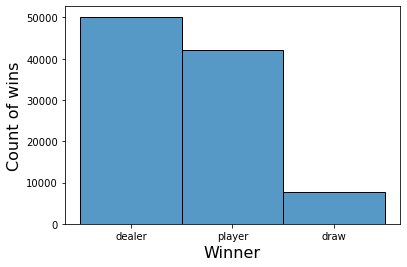

In [12]:
#Histogram of total hands win/loss/draw
ax=sns.histplot(winners)
ax.set_xlabel("Winner",fontsize=16);
ax.set_ylabel("Count of wins",fontsize=16);

In [13]:
def TheRandom(dealer, player, bet, win):  
    #Generates Uni(0,1), under .5 stands, over hits
    x=random.random()
    if x>0.5 and sum(player)<13:
        hit(player)
        return player,bet
    return player, bet

In [14]:
#Randomly hit a single time if player is under 13
simdata=[]
winners=[]
dealerstart=[]
playerstart=[]
playerend=[]
sim_data=pd.DataFrame()
for i in range(0,100000):    
    card_deck=gen_cards(1)
    dealer, player, bet, win, winner = deal(10)
    if win==False:
        player, bet=TheRandom(dealer,player,bet,win)
        dealer_action(dealer,player)
    if win==False:
        bet, winner = totals(dealer, player, bet)
    simdata.append(bet)
    winners.append(winner)
    dealerstart.append(dealer[0])
    playerstart.append(player[0])
    playerend.append(player[1])

In [15]:
x=winners.count("dealer")
y=winners.count("player")
z=winners.count("draw")
print("Total Profit(loss):",sum(simdata))
print("Dealer won",x,"hands")
print("Player won", y,"hands")
print("Draws", z)
print("Dealers win percentage",round((100*x/(y+x)),2))

Total Profit(loss): -100770.0
Dealer won 53376 hands
Player won 40963 hands
Draws 5661
Dealers win percentage 56.58


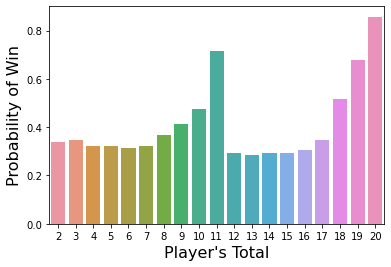

In [16]:
#Data collection 
#Combine all parts of sim into single dataframe
sim_data=pd.DataFrame({"Bet":simdata,"Winner": winners, "DealerStart":dealerstart,"PlayerStart":playerstart,"PlayerEnd":playerend})
sim_data["PlayerHas"]=sim_data["PlayerStart"]+sim_data["PlayerEnd"]
#Groupby player starting hand and who won for winning percentage
PlayerStat=sim_data.groupby(["PlayerHas", "Winner"]).count()
x=PlayerStat.xs('player', level=1)
y=PlayerStat.xs('dealer', level=1)
#Ignoring pushes, only care about win/loss
z=x/(x+y)
z1=[]
for i in range(0,len(z.values)):
    z1.append(z.values[i][0])
#Plot of Probabilities
ax = sns.barplot(x=z.index,y=z1)
ax.set_xlabel("Player's Total",fontsize=16);
ax.set_ylabel("Probability of Win",fontsize=16);

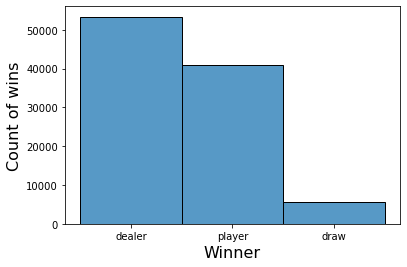

In [17]:
#Histogram of total hands win/loss/draw
ax=sns.histplot(winners)
ax.set_xlabel("Winner",fontsize=16);
ax.set_ylabel("Count of wins",fontsize=16);

In [18]:
def TheCoward(dealer, player, bet, win):  
    #Literally does nothing
    return player, bet

In [19]:
#The coward, does not hit anything, only stands
simdata=[]
winners=[]
dealerstart=[]
playerstart=[]
playerend=[]
sim_data=pd.DataFrame()
for i in range(0,100000): 
    card_deck=gen_cards(1)
    dealer, player, bet, win, winner = deal(10)
    if win==False:
        player, bet=TheCoward(dealer,player,bet,win)
        dealer_action(dealer,player)
    if win==False:
        bet, winner = totals(dealer, player, bet)
    simdata.append(bet)
    winners.append(winner)
    dealerstart.append(dealer[0])
    playerstart.append(player[0])
    playerend.append(player[1])

In [20]:
x=winners.count("dealer")
y=winners.count("player")
z=winners.count("draw")
print("Total Profit(loss):",sum(simdata))
print("Dealer won",x,"hands")
print("Player won", y,"hands")
print("Draws", z)
print("Dealers win percentage",round((100*x/(y+x)),2))

Total Profit(loss): -155490.0
Dealer won 56549 hands
Player won 38678 hands
Draws 4773
Dealers win percentage 59.38


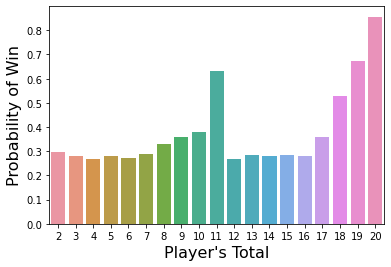

In [21]:
#Data collection 
#Combine all parts of sim into single dataframe
sim_data=pd.DataFrame({"Bet":simdata,"Winner": winners, "DealerStart":dealerstart,"PlayerStart":playerstart,"PlayerEnd":playerend})
sim_data["Cumulative"]=sim_data["Bet"].cumsum()
sim_data["PlayerHas"]=sim_data["PlayerStart"]+sim_data["PlayerEnd"]
#Groupby player starting hand and who won for winning percentage
PlayerStat=sim_data.groupby(["PlayerHas", "Winner"]).count()
x=PlayerStat.xs('player', level=1)
y=PlayerStat.xs('dealer', level=1)
#Ignoring pushes, only care about win/loss
z=x/(x+y)
z1=[]
for i in range(0,len(z.values)):
    z1.append(z.values[i][0])
#Plot of Probabilities
ax = sns.barplot(x=z.index,y=z1)
ax.set_xlabel("Player's Total",fontsize=16);
ax.set_ylabel("Probability of Win",fontsize=16);

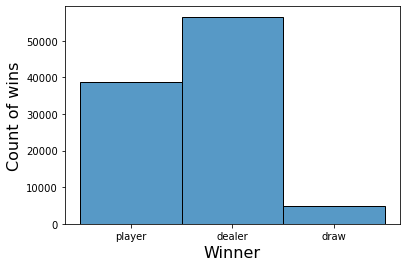

In [22]:
#Histogram of total hands win/loss/draw
ax=sns.histplot(winners)
ax.set_xlabel("Winner",fontsize=16);
ax.set_ylabel("Count of wins",fontsize=16);

In [23]:
#CardCounting with Hi-Lo
CardVals={'1':-1,'2':1,'3':1,'4':1,'5':1,'6':1,'7':0,'8':0,'9':0,'10':-1}
simdata=[]
winners=[]
dealerstart=[]
playerstart=[]
playerend=[]
sim_data=pd.DataFrame()
low=10
high=150
simchart=[]
for a in range(0,50):
    for i in range(0,2500):
    #6 deck shoe
        card_deck=gen_cards(6)
        CardCount=0
    #Shuffle cards every 40 hands
        for i in range(0,40):
            TrueCount=CardCount/(len(card_deck)/52)
            if TrueCount>5:
                bet=high
            else:
                bet=low
            dealer, player, bet, win, winner = deal(bet)
            if win==False:
                player, bet=initial_player_action(dealer,player,bet,win)
                dealer_action(dealer,player)
            if win==False:
                bet, winner = totals(dealer, player, bet)
            simdata.append(bet)
            winners.append(winner)
            dealerstart.append(dealer[0])
            playerstart.append(player[0])
            playerend.append(player[1])
            
            #print("\n",dealer, player, bet, winner, TrueCount, CardCount, "\n", card_deck.count(1), card_deck.count(10))
            for d in dealer:
                CardCount+=CardVals[str(d)]
            for p in player:
                CardCount+=CardVals[str(p)]
    simchart.append(sum(simdata[-100000:]))

Min: -25620.0 Max: 18075.0 Avg: 1849.2


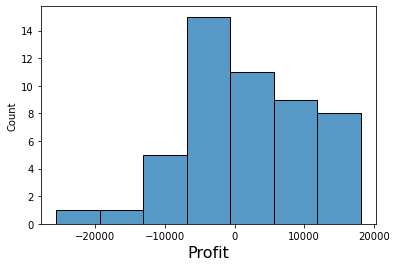

In [24]:
#Chart of total profit(loss) across 50 runs of 100,000 hands
ax=sns.histplot(simchart);
ax.set_xlabel("Profit",fontsize=16);
print("Min:",min(simchart), "Max:",max(simchart), "Avg:",sum(simchart)/len(simchart))

In [25]:
#Total results
x=winners.count("dealer")
y=winners.count("player")
z=winners.count("draw")
print("Total Profit(loss):",sum(simdata))
print("Dealer won",x,"hands")
print("Player won", y,"hands")
print("Draws", z)
print("Dealers win percentage",round((100*x/(y+x)),2))

Total Profit(loss): 92460.0
Dealer won 2403648 hands
Player won 2173553 hands
Draws 422799
Dealers win percentage 52.51


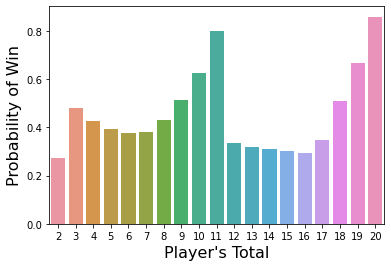

In [26]:
#Data collection 
#Combine all parts of sim into single dataframe
sim_data=pd.DataFrame({"Bet":simdata,"Winner": winners, "DealerStart":dealerstart,"PlayerStart":playerstart,"PlayerEnd":playerend})
sim_data["Cumulative"]=sim_data["Bet"].cumsum()
sim_data["PlayerHas"]=sim_data["PlayerStart"]+sim_data["PlayerEnd"]
#Groupby player starting hand and who won for winning percentage
PlayerStat=sim_data.groupby(["PlayerHas", "Winner"]).count()
x=PlayerStat.xs('player', level=1)
y=PlayerStat.xs('dealer', level=1)
#Ignoring pushes, only care about win/loss
z=x/(x+y)
z1=[]
for i in range(0,len(z.values)):
    z1.append(z.values[i][0])
#Plot of Probabilities
ax = sns.barplot(x=z.index,y=z1)
ax.set_xlabel("Player's Total",fontsize=16);
ax.set_ylabel("Probability of Win",fontsize=16);

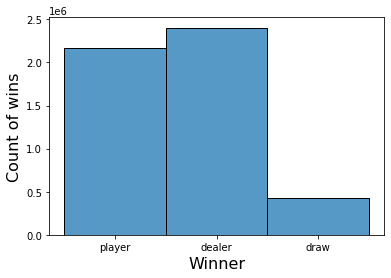

In [27]:
#Histogram of total hands win/loss/draw
ax=sns.histplot(winners)
ax.set_xlabel("Winner",fontsize=16);
ax.set_ylabel("Count of wins",fontsize=16);